## Visualización

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pyodbc

### Ejercicio 1
Establece una conexión con la base de datos AdventureWorks2022 y muestra los primeros 3 registros de la tabla `HumanResources.Employee`

In [6]:
# Realizo la conexión con la base de datos
conn = pyodbc.connect(
    'DRIVER={SQL Server};\
    SERVER={217.160.32.109};\
    DATABASE={AdventureWorks2022};\
    UID={alumnos_neoland};\
    PWD={Neoland2024}'
)

In [8]:
# Funcion para conectarse y hacer consulta
def consulta(query):
    """
    DOCUMENTACION
    """
    cursor = conn.cursor()
    cursor.execute(query)
    rows = cursor.fetchall()
    columns = [i[0] for i in cursor.description]
    df = pd.DataFrame.from_records(
        rows,
        columns = columns
    )
    return df

In [10]:
query = 'SELECT TOP 3 * FROM HumanResources.Employee'
consulta(query)

,BusinessEntityID,NationalIDNumber,LoginID,OrganizationNode,OrganizationLevel,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,SalariedFlag,VacationHours,SickLeaveHours,CurrentFlag,rowguid,ModifiedDate
0,1,295847284,adventure-works\ken0,None,NaN,Chief Executive Officer,1969-01-29,S,M,2009-01-14,True,99,69,True,F01251E5-96A3-448D-981E-0F99D789110D,2014-06-30
1,2,245797967,adventure-works\terri0,b'X',1.0,Vice President of Engineering,1971-08-01,S,F,2008-01-31,True,1,20,True,45E8F437-670D-4409-93CB-F9424A40D6EE,2014-06-30
2,3,509647174,adventure-works\roberto0,b'Z\xc0',2.0,Engineering Manager,1974-11-12,M,M,2007-11-11,True,2,21,True,9BBBFB2C-EFBB-4217-9AB7-F97689328841,2014-06-30


### Ejercicio 2
De la tabla `HumanResources.Employee` mostrar la cantidad de empleados por `MaritalStatus` en un gráfico de barras

In [13]:
query = 'SELECT MaritalStatus, COUNT(BusinessEntityID) as Empleados FROM HumanResources.Employee GROUP BY MaritalStatus'
marital = consulta(query)

<Axes: xlabel='MaritalStatus', ylabel='Empleados'>

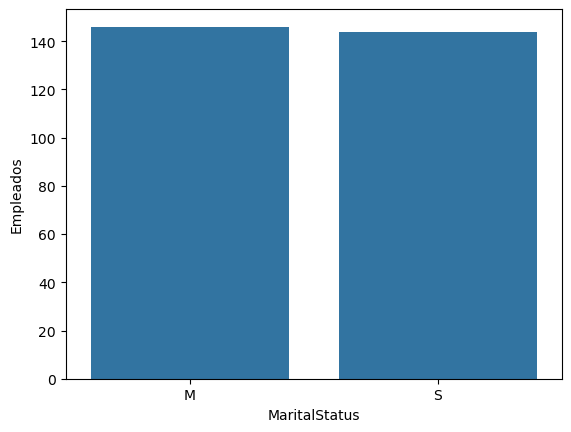

In [15]:
sns.barplot(
    data = marital,
    x = 'MaritalStatus',
    y = 'Empleados',
)

### Ejercicio 3
De la tabla `HumanResources.Employee` mostrar la cantidad de empleados por `MaritalStatus` en un gráfico de barras. Mostrar una barra por cada `Gender`

In [19]:
query = 'SELECT MaritalStatus, Gender, COUNT(BusinessEntityID) as Empleados FROM HumanResources.Employee GROUP BY MaritalStatus, Gender'
maritalg = consulta(query)

<Axes: xlabel='MaritalStatus', ylabel='Empleados'>

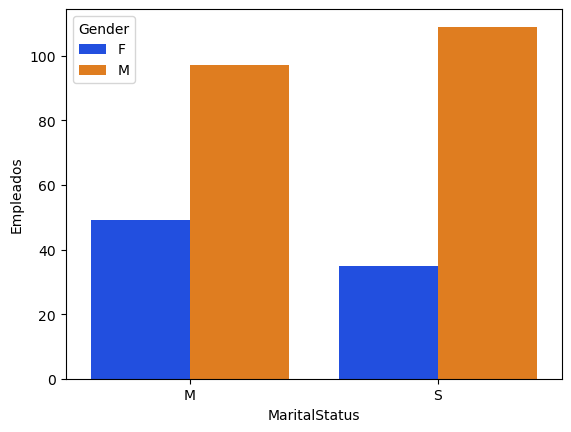

In [21]:
sns.barplot(
    data = maritalg,
    x = 'MaritalStatus',
    y = 'Empleados',
    hue = 'Gender',
    palette = 'bright'
)

### Ejercicio 4
De la tabla `Sales.SalesOrderHeader` mostrar el total de ventas (`TotalDue`) mensuales (`OrderDate`)en un gráfico de líneas.

Puede ser de utilidad leer sobre el módulo `dt` dentro de pandas, en particular:
* el método `dt.to_period()` para extraer el mes de la venta (https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.to_period.html)
* el método `dt.to_timestamp()` para convertir el resultado anterior en una fecha (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_timestamp.html#pandas.DataFrame.to_timestamp)

In [24]:
query = 'SELECT OrderDate, SUM(TotalDue) AS TotalVentas FROM Sales.SalesOrderHeader GROUP BY OrderDate ORDER BY OrderDate'
ventasdia = consulta(query)

In [26]:
#ventasdia['OrderDate'] = pd.to_datetime(ventasdia['OrderDate'], format = "%Y/%m/%d")
ventasdia['OrderDate'] = ventasdia['OrderDate'].dt.to_period('M').dt.to_timestamp()


In [28]:
#ventasdia['DueDate'] = ventasdia['DueDate'].dt.month_name()
ventasmes = ventasdia.groupby('OrderDate').sum().reset_index()
ventasmes

,OrderDate,TotalVentas
0,2011-05-01,567020.9498
1,2011-06-01,507096.4690
2,2011-07-01,2292182.8828
3,2011-08-01,2800576.1723
4,2011-09-01,554791.6082
5,2011-10-01,5156269.5291
6,2011-11-01,815313.0152
7,2011-12-01,1462448.8986
8,2012-01-01,4458337.4444
9,2012-02-01,1649051.9001


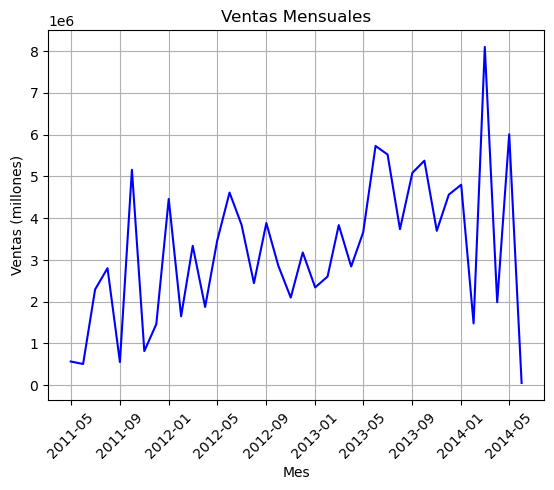

In [30]:
# Crear gráfico de línea
sns.lineplot(
    data = ventasmes, 
    x = "OrderDate", 
    y = "TotalVentas", 
    color = "blue"
)
# Personalizar
plt.title("Ventas Mensuales")
plt.grid()
# Rotar etiquetas del eje X
plt.xticks(rotation=45)
plt.xlabel("Mes")
# Aplicar formato en millones
#plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x/1e6:.1f}M'))
plt.ylabel("Ventas (millones)")
plt.show()

### Ejercicio 5
De la tabla `Production.Product` mostrar un histograma con los precios de lista de los productos (`ListPrice`). No deben ser tenidos en cuenta los productos con precio de lista igual a cero.

In [34]:
query = 'SELECT p.ProductId, psc.ProductCategoryID, p.ProductSubcategoryID, pc.Name AS CatName, p.Name AS ProdName, p.ListPrice FROM Production.Product p LEFT JOIN Production.ProductSubCategory psc ON p.ProductSubCategoryID = psc.ProductSubCategoryID LEFT JOIN Production.ProductCategory pc ON psc.ProductCategoryID = pc.ProductCategoryID WHERE p.ListPrice > 0 '
precios = consulta(query)

<Axes: xlabel='ListPrice', ylabel='Count'>

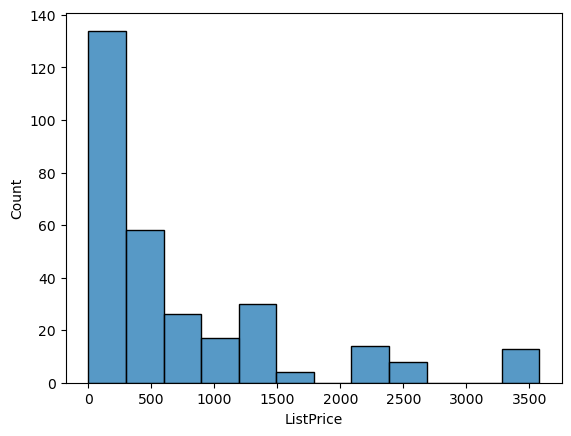

In [36]:
sns.histplot(
    data = precios,
    x = 'ListPrice'
)

### Ejercicio 6
De la tabla `Production.Product` mostrar un histograma con los precios de lista de los productos (`ListPrice`). No deben ser tenidos en cuenta los productos con precio de lista igual a cero.

Además tiene que verse el detalle por categoría de producto

<Axes: xlabel='ListPrice', ylabel='Count'>

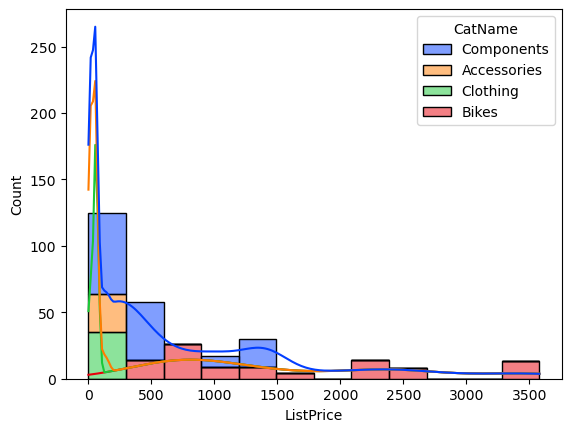

In [39]:
sns.histplot(
    data = precios,
    x = 'ListPrice',
    hue = 'CatName',
    kde = 'true',
    palette = 'bright',
    multiple = 'stack'
)